<a href="https://colab.research.google.com/github/ja-yu/AI/blob/main/Basic_classification_Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification

In [2]:
# Tensoirflow

# -*- coding: utf-8 -*-

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [4]:
## Import載入 the Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

## 訓練資料 train_images(圖), train_labels(答案)
## 測試資料 test_images, test_labels

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


##Loading the dataset returns four NumPy arrays:
## 十種類別

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
## 有幾筆訓練資料
print(train_images.shape)

len(train_labels)

(60000, 28, 28)


60000

In [5]:
## 各訓練資料類別
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
## 有幾筆測試資料
print(test_images.shape)

len(test_labels)

(10000, 28, 28)


10000

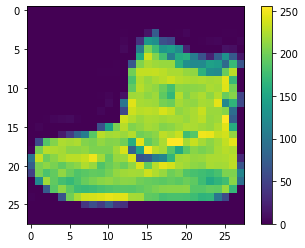

In [9]:
## Preprocess the data

plt.figure()          ## 創建圖
plt.imshow(train_images[0])  ## 將數據顯示為圖像
plt.colorbar()         ## 顏色條或漸變色條
plt.grid(False)        ## 不(False)顯示網格
plt.show()

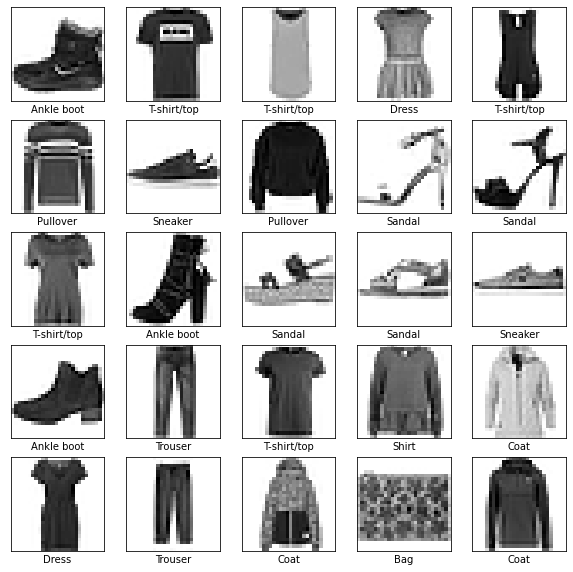

In [10]:
## Scale these values to a range of 0 to 1 before feeding them to the neural network model. 

train_images = train_images / 255.0   ## 2的8次(https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/44874/)

test_images = test_images / 255.0

## To verify that the data is in the correct format 

plt.figure(figsize=(10,10))         ## 圖像大小
for i in range(25):
    plt.subplot(5,5,i+1)         ## subplot繪製多個子圖
    plt.xticks([])            ## 設定刻度位置和 x 軸標籤的屬性
    plt.yticks([])            ## 設定刻度位置和 y 軸標籤的屬性
    plt.grid(False)           ## 不(False)顯示網格
    plt.imshow(train_images[i], cmap=plt.cm.binary)  ## 將數據顯示為圖像 cmap: 顏色圖譜（colormap)
    plt.xlabel(class_names[train_labels[i]])  ## 圖的標籤
plt.show()  ## 顯示圖片

In [11]:
## Build the model
## KERAS開發模式: 1.Sequential(堆積木)  2.FUCTIONAL api   3.SUBCLASS(物件導向 子類別)   

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  ## 圖像轉換成一維
    tf.keras.layers.Dense(128, activation='relu'),  ## 第一層128個神經元  ## 激活函数Activations
    tf.keras.layers.Dense(10)             ## 十個類別
])

## 設定參數
model.compile(optimizer='adam',   ## 以compile函數設定訓練模型  優化器Optimizers
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  ##損失函數Losses 
              metrics=['accuracy'])  ## 評估標準Metrics

## Train the model

model.fit(train_images, train_labels, epochs=10)  ## epochs訓練次數

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5002 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3753 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2936 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2794 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2573 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [18]:
### Evaluate accuracy

## 測試精準度 test_acc

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)  ## verbose日誌顯示，0為不輸出日誌訊息，1為輸出進度條紀錄

print('\nTest accuracy:', test_acc)  

313/313 - 0s - loss: 0.3239 - accuracy: 0.8853

Test accuracy: 0.8852999806404114


In [21]:
### Make predictions

probability_model = tf.keras.Sequential([model, 
                     tf.keras.layers.Softmax()])  ## Softmax()轉成機率

predictions = probability_model.predict(test_images)  ## 預測值

predictions[0]

array([2.16305929e-09, 4.25831289e-12, 1.27093865e-11, 2.38194078e-12,
       2.94769547e-12, 2.12430037e-04, 4.03079403e-10, 1.46092393e-03,
       3.16436921e-09, 9.98326600e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])  ## 返回最大值索引

9

In [23]:
test_labels[0]  ## 檢查是否正確

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)  ## 不(False)顯示網格
  plt.xticks([])  ## 設定刻度位置和 x 軸標籤的屬性
  plt.yticks([])  ## 設定刻度位置和 y 軸標籤的屬性
  plt.imshow(img, cmap=plt.cm.binary)  ## 將數據顯示為圖像 cmap: 顏色圖譜（colormap)

  predicted_label = np.argmax(predictions_array)  ## 返回最大值索引
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")  ## 長條圖
  plt.ylim([0, 1])  ## 設定y軸範圍
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

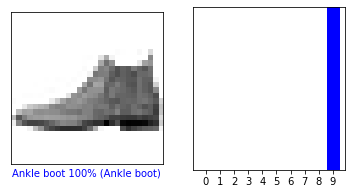

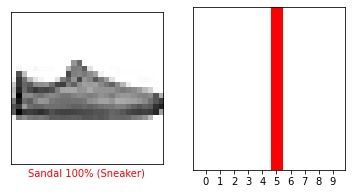

In [31]:
### Verify predictions

i = 0
plt.figure(figsize=(6,3))  ## 圖像大小
plt.subplot(1,2,1)     ## subplot繪製多個子圖
plot_image(i, predictions[i], test_labels, test_images)  ## 呼叫plot_image函數
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)  ## 呼叫plot_value_array函數
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

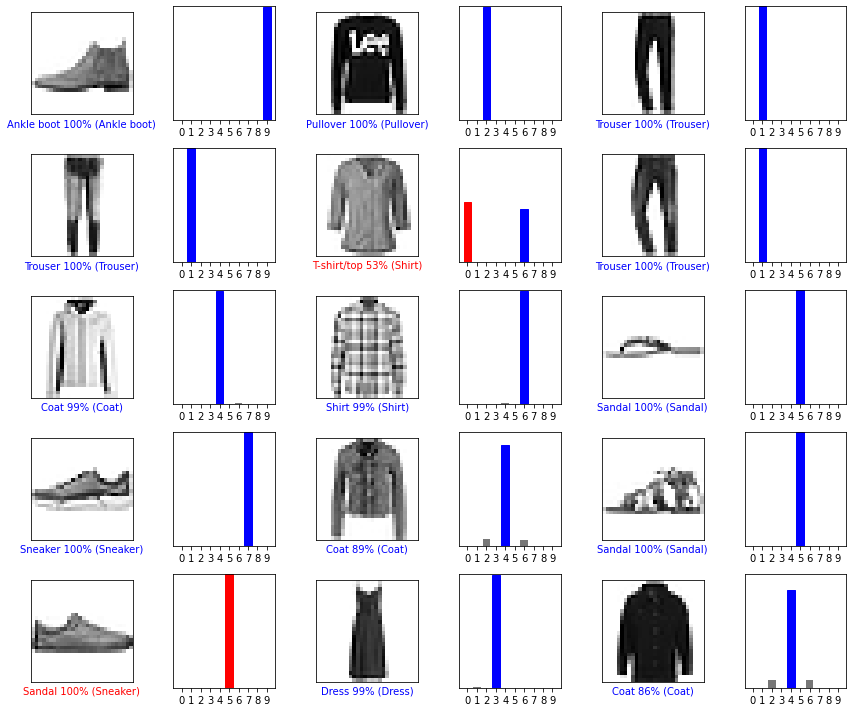

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()  ## 自動調整繪圖區的大小及間距
plt.show()

(28, 28)
(1, 28, 28)
[[3.8376344e-05 2.3639872e-16 9.9789125e-01 5.5501923e-09 6.2207878e-04
  1.3754102e-13 1.4482727e-03 1.0087639e-13 3.3514407e-09 2.1904370e-13]]


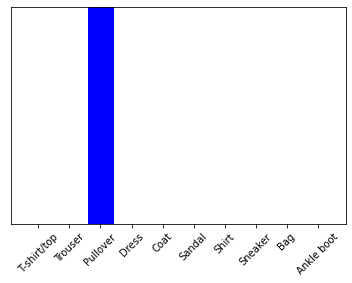

In [35]:
## Use the trained model

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))  ## 擴充套件陣列的形狀 在0位置新增資料

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)  ## rotation旋轉x軸刻度

In [36]:
np.argmax(predictions_single[0])

2